<a href="https://colab.research.google.com/github/jorferr89/10-ejemplos-opencv-python/blob/main/HaarCascadesPersonas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Detección de Personas con Haar Cascades

Se importan las librerías necesarias.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Se carga la foto a color.

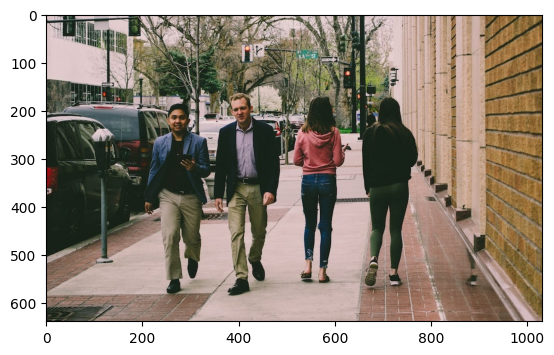

In [ ]:
image = cv2.imread('imagen-personas.jpg')
# Convierte a RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Se convierte la imagen a escala de grises.

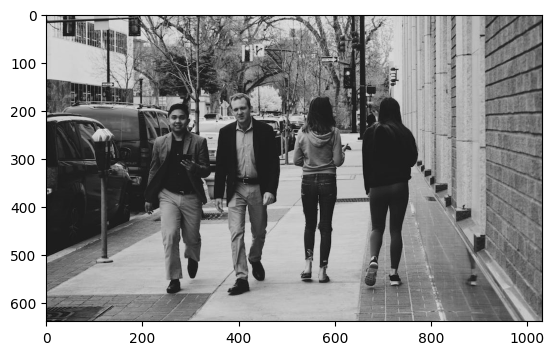

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

Se carga un modelo pre-entrenado para detectar múltiples personas (cuerpo completo) en una imagen. Los pesos y parámetros de este modelo están en el archivo haarcascade_fullbody.xml.

In [ ]:
body_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_fullbody.xml')
# Ejecutar en la imagen en escala de grises.
bodies = body_cascade.detectMultiScale(gray, 1.1, 1)

El clasificador nos devuelve un arreglo de recuadros delimitadores para cada persona encontrada en la imagen.

In [ ]:
print(f'{len(bodies)} personas detectadas.')
print('Coordenadas en el siguiente formato: (X, Y, width, height)')
print('=============================')
print(bodies)

4 personas detectadas.
Coordenadas en el siguiente formato: (X, Y, width, height)
[[597 127 211 422]
 [474 205 175 349]
 [294  83 252 505]
 [167 174 223 447]]


Se dibuja los cuadros que el algoritmo encontró encima de la imagen original para visualizar si
dichas detecciones tienen sentido.

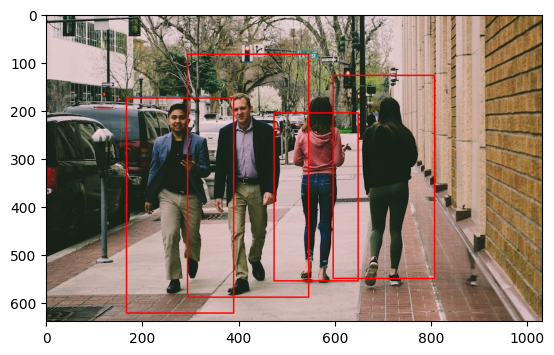

In [ ]:
image_with_detections = np.copy(image)
for (x, y, width, height) in bodies:
  cv2.rectangle(image_with_detections, (x, y), (x + width, y + height), (255, 0, 0), 2)
plt.imshow(image_with_detections)